# Clustering

Clustering is a type of unsupervised machine learning technique where the goal is to group similar data points into clusters or groups based on some inherent patterns or similarities within the data. The algorithm doesn't rely on predefined labels; instead, it identifies the structure in the data itself.

**Key points about clustering:**

1. **Objective:** The primary objective of clustering is to discover natural groupings or structures within a dataset.

2. **Unsupervised Learning:** Clustering is considered an unsupervised learning task because the algorithm is not provided with labeled data. It explores the data's inherent structure without guidance from predefined categories.

3. **Similarity Metric:** Clustering algorithms use a similarity metric to determine how closely related or similar data points are. Common metrics include Euclidean distance, cosine similarity, or other distance measures.

4. **Cluster Centers:** The algorithms aim to define cluster centers or centroids that represent the central points within each group.

**Common clustering algorithms:**

- **K-Means:** Partitioning the data into k clusters by iteratively assigning points to the cluster whose centroid is closest.

- **Hierarchical Clustering:** Building a tree-like hierarchy of clusters, where the top node represents a single cluster and the leaves represent individual data points.

- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):** Identifying clusters based on regions of high data point density.

- **Agglomerative Clustering:** A bottom-up approach where each data point starts as its own cluster and clusters are successively merged based on similarity.

Clustering is used in various applications, such as customer segmentation, anomaly detection, image segmentation, and document categorization. It helps uncover patterns and structures within datasets without the need for labeled examples.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
X = df.iloc[:, [3, 4]].values
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## KMeans

K-Means is a popular clustering algorithm in machine learning and data mining. It partitions a dataset into k clusters, where each data point belongs to the cluster with the nearest mean (centroid). The algorithm iteratively refines the cluster assignments until convergence.


## Intuitive working:
1. Select K random points
2. Calculate centroid for all the points and assign points to closest centroid
3. Repeat till converge

## Random initialization problem

Random initialiaztion doesn't always work : to solve this problem use KMeans++

In [9]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10,  random_state=0)
y_kmeans = clf.fit_predict(X)

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


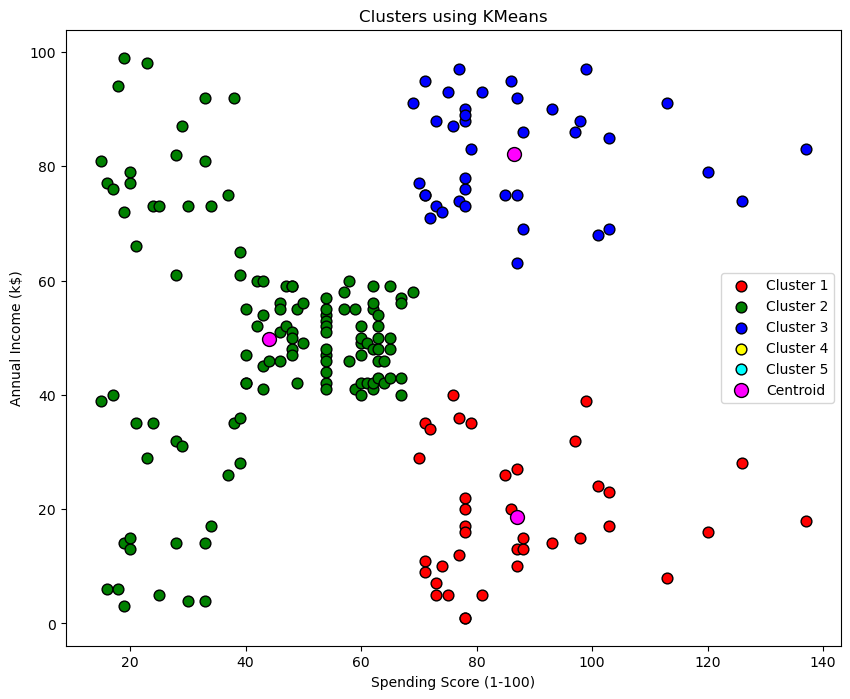

In [10]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color='blue',s=60, label='Cluster 3', edgecolors='black')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color='yellow', s=60, label='Cluster 4', edgecolors='black')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color='cyan', s=60, label='Cluster 5', edgecolors='black')
# cluster centres
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid',edgecolors='black')
plt.legend()
plt.title('Clusters using KMeans')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.show()

**Exercice**: Comment on this. We used 3 clusters. Was it a wise choice?

## Selecting number of clusters (Elbow method)
Within Cluster Sum of Squares is the sum of squares of the distance of every point to the nearest cluster. Initially it will be very high and then it will lower and lower and will eventually reach 0. We have to make a call and decide what is the best value of K depending on the slope obtained on increasing the cluster. If at a point, increase in number of cluster doesn't decrease a substantial amount of WCSS then that's the ideal number of clusters. 

__In short: We're maximizing the second derivative of WCSS__

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

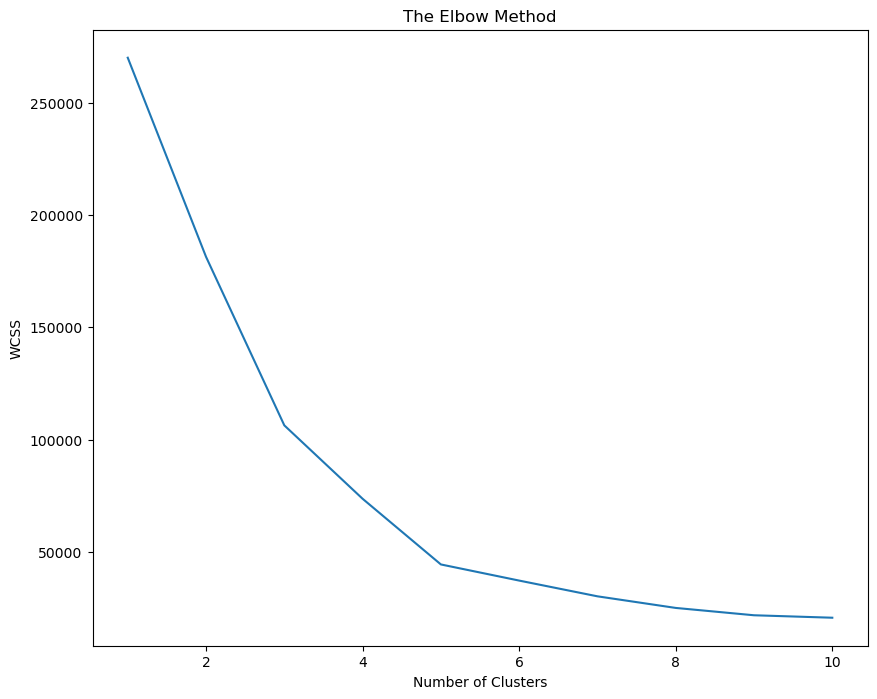

In [11]:
from sklearn.cluster import KMeans

fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clf.fit(X)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS

plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

**Exercice**: Try to select a number of clusters based on the ELBOW method and run the K-means again. Comment